In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona

In [2]:
hp_shapes = gpd.read_file(r'D:\CivicDataLabs_IDS-DRR\IDS-DRR_Github\HP\flood-data-ecosystem-Himachal-Pradesh\Maps\bharatmaps_HP_subdistricts.geojson')
hp_shapes

,objectid,stcode11,dtcode11,sdtcode11,stname,dtname,sdtname,subdt_lgd,dist_lgd,state_lgd,st_area_sh,st_length_,remarks,ac_no,test,st_area(shape),st_length(shape),geometry
0,1,02,023,00088,HIMACHAL PRADESH,Chamba,Bhattiyat,88,16,2,0.0,0.0,,5,2,3.695661e+08,101900.165772,"MULTIPOLYGON (((76.03658 32.52185, 76.03717 32..."
1,2,02,023,00092,HIMACHAL PRADESH,Chamba,Bharmour,92,16,2,0.0,0.0,,2,3,1.334739e+09,239400.256000,"MULTIPOLYGON (((76.78355 32.54782, 76.78401 32..."
2,3,02,023,00090,HIMACHAL PRADESH,Chamba,Chamba,90,16,2,0.0,0.0,,3,4,1.422634e+09,195066.808024,"MULTIPOLYGON (((76.09595 32.70255, 76.09641 32..."
3,4,02,023,00084,HIMACHAL PRADESH,Chamba,Churah,84,16,2,0.0,0.0,,1,5,1.652463e+09,224217.320127,"MULTIPOLYGON (((76.22226 33.02277, 76.22303 33..."
4,5,02,023,00087,HIMACHAL PRADESH,Chamba,Dalhousie,87,16,2,0.0,0.0,,4,6,2.287591e+08,85680.411712,"MULTIPOLYGON (((75.92925 32.61495, 75.93061 32..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,3317,02,033,00183,HIMACHAL PRADESH,Shimla,Junga,183,23,2,0.0,0.0,,62,3318,1.504535e+08,63973.266994,"MULTIPOLYGON (((77.30567 31.00461, 77.30567 31..."
119,3318,02,032,00176,HIMACHAL PRADESH,Sirmaur,Ronhat,176,24,2,0.0,0.0,,59,3319,1.341459e+08,63052.419007,"MULTIPOLYGON (((77.62574 30.80987, 77.62637 30..."
120,3396,02,027,00130,HIMACHAL PRADESH,Mandi,Bhadrota,130,22,2,0.0,0.0,,35,3397,1.077063e+08,58588.320611,"MULTIPOLYGON (((76.77496 31.62199, 76.77486 31..."
121,3397,02,029,00147,HIMACHAL PRADESH,Una,Bharwain,147,26,2,0.0,0.0,,41,3398,1.361356e+08,101878.868579,"MULTIPOLYGON (((76.06412 31.84618, 76.06429 31..."


In [3]:
hp_shapes['sdtcode11'] = hp_shapes['sdtcode11'].astype(int)
hp_shapes

,objectid,stcode11,dtcode11,sdtcode11,stname,dtname,sdtname,subdt_lgd,dist_lgd,state_lgd,st_area_sh,st_length_,remarks,ac_no,test,st_area(shape),st_length(shape),geometry
0,1,02,023,88,HIMACHAL PRADESH,Chamba,Bhattiyat,88,16,2,0.0,0.0,,5,2,3.695661e+08,101900.165772,"MULTIPOLYGON (((76.03658 32.52185, 76.03717 32..."
1,2,02,023,92,HIMACHAL PRADESH,Chamba,Bharmour,92,16,2,0.0,0.0,,2,3,1.334739e+09,239400.256000,"MULTIPOLYGON (((76.78355 32.54782, 76.78401 32..."
2,3,02,023,90,HIMACHAL PRADESH,Chamba,Chamba,90,16,2,0.0,0.0,,3,4,1.422634e+09,195066.808024,"MULTIPOLYGON (((76.09595 32.70255, 76.09641 32..."
3,4,02,023,84,HIMACHAL PRADESH,Chamba,Churah,84,16,2,0.0,0.0,,1,5,1.652463e+09,224217.320127,"MULTIPOLYGON (((76.22226 33.02277, 76.22303 33..."
4,5,02,023,87,HIMACHAL PRADESH,Chamba,Dalhousie,87,16,2,0.0,0.0,,4,6,2.287591e+08,85680.411712,"MULTIPOLYGON (((75.92925 32.61495, 75.93061 32..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,3317,02,033,183,HIMACHAL PRADESH,Shimla,Junga,183,23,2,0.0,0.0,,62,3318,1.504535e+08,63973.266994,"MULTIPOLYGON (((77.30567 31.00461, 77.30567 31..."
119,3318,02,032,176,HIMACHAL PRADESH,Sirmaur,Ronhat,176,24,2,0.0,0.0,,59,3319,1.341459e+08,63052.419007,"MULTIPOLYGON (((77.62574 30.80987, 77.62637 30..."
120,3396,02,027,130,HIMACHAL PRADESH,Mandi,Bhadrota,130,22,2,0.0,0.0,,35,3397,1.077063e+08,58588.320611,"MULTIPOLYGON (((76.77496 31.62199, 76.77486 31..."
121,3397,02,029,147,HIMACHAL PRADESH,Una,Bharwain,147,26,2,0.0,0.0,,41,3398,1.361356e+08,101878.868579,"MULTIPOLYGON (((76.06412 31.84618, 76.06429 31..."


In [4]:
hp_shapes = hp_shapes[['sdtcode11','sdtname','geometry']]

<Axes: >

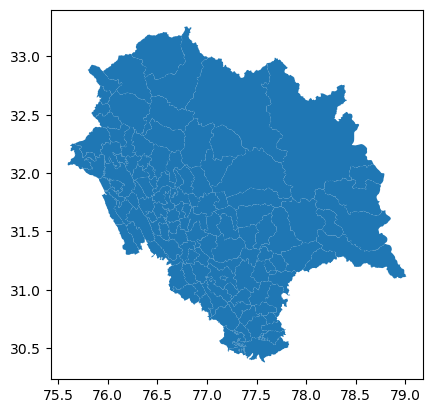

In [5]:
hp_shapes.plot()

In [6]:
risk_score = pd.read_csv(r'D:\CivicDataLabs_IDS-DRR\IDS-DRR_Github\HP\flood-data-ecosystem-Himachal-Pradesh\RiskScoreModel\data\risk_simplified.csv')
risk_score

,Unnamed: 0,timeperiod,sdtcode11,exposure,flood-hazard,government-response,vulnerability,topsis-score,risk-score
0,0,2021_04,173.0,4,2.0,5,3,0.679078,5
1,1,2021_04,93.0,4,2.0,5,3,0.679078,5
2,2,2021_04,172.0,2,2.0,5,4,0.664871,5
3,3,2021_04,103.0,2,2.0,5,4,0.664871,5
4,4,2021_04,95.0,2,2.0,5,4,0.664871,5
...,...,...,...,...,...,...,...,...,...
3562,3562,2023_08,114.0,1,1.0,5,1,0.000000,1
3563,3563,2023_08,182.0,1,1.0,5,1,0.000000,1
3564,3564,2023_08,194.0,1,1.0,5,1,0.000000,1
3565,3565,2023_08,157.0,1,1.0,5,1,0.000000,1


In [7]:
risk_score['sdtcode11'] = risk_score['sdtcode11'].astype(int)
risk_score

,Unnamed: 0,timeperiod,sdtcode11,exposure,flood-hazard,government-response,vulnerability,topsis-score,risk-score
0,0,2021_04,173,4,2.0,5,3,0.679078,5
1,1,2021_04,93,4,2.0,5,3,0.679078,5
2,2,2021_04,172,2,2.0,5,4,0.664871,5
3,3,2021_04,103,2,2.0,5,4,0.664871,5
4,4,2021_04,95,2,2.0,5,4,0.664871,5
...,...,...,...,...,...,...,...,...,...
3562,3562,2023_08,114,1,1.0,5,1,0.000000,1
3563,3563,2023_08,182,1,1.0,5,1,0.000000,1
3564,3564,2023_08,194,1,1.0,5,1,0.000000,1
3565,3565,2023_08,157,1,1.0,5,1,0.000000,1


In [8]:
risk_shapes = risk_score.merge(hp_shapes, on = 'sdtcode11')
risk_shapes

,Unnamed: 0,timeperiod,sdtcode11,exposure,flood-hazard,government-response,vulnerability,topsis-score,risk-score,sdtname,geometry
0,0,2021_04,173,4,2.0,5,3,0.679078,5,Paonta Sahib,"MULTIPOLYGON (((77.57143 30.61129, 77.57208 30..."
1,1,2021_04,93,4,2.0,5,3,0.679078,5,Nurpur,"MULTIPOLYGON (((75.94244 32.39536, 75.94280 32..."
2,2,2021_04,172,2,2.0,5,4,0.664871,5,Nahan,"MULTIPOLYGON (((77.19999 30.68444, 77.19917 30..."
3,3,2021_04,103,2,2.0,5,4,0.664871,5,Dera Gopipur,"MULTIPOLYGON (((76.02083 32.13686, 76.02030 32..."
4,4,2021_04,95,2,2.0,5,4,0.664871,5,Fatehpur,"MULTIPOLYGON (((75.94561 32.16008, 75.94648 32..."
...,...,...,...,...,...,...,...,...,...,...,...
3562,3562,2023_08,114,1,1.0,5,1,0.000000,1,Udaipur,"MULTIPOLYGON (((76.80258 33.25385, 76.80344 33..."
3563,3563,2023_08,182,1,1.0,5,1,0.000000,1,Shimla (urban),"MULTIPOLYGON (((77.16427 31.11695, 77.16483 31..."
3564,3564,2023_08,194,1,1.0,5,1,0.000000,1,Hangrang,"MULTIPOLYGON (((78.68343 32.07271, 78.68937 32..."
3565,3565,2023_08,157,1,1.0,5,1,0.000000,1,Namhol,"MULTIPOLYGON (((76.82845 31.34748, 76.82900 31..."


In [9]:
from geopandas import GeoDataFrame

In [10]:
geometry = risk_shapes['geometry']
risk_gdf = GeoDataFrame(risk_shapes, crs="EPSG:4326", geometry=geometry)

<Axes: >

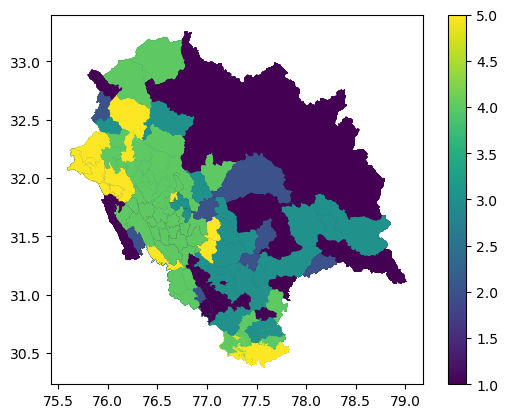

In [11]:
risk_gdf.plot(column="risk-score", legend = True)

In [13]:
Aug_23 = risk_gdf.loc[risk_gdf['timeperiod'] == '2023_08']
Aug_23

,Unnamed: 0,timeperiod,sdtcode11,exposure,flood-hazard,government-response,vulnerability,topsis-score,risk-score,sdtname,geometry
3444,3444,2023_08,173,4,2.0,5,3,0.674429,5,Paonta Sahib,"MULTIPOLYGON (((77.57143 30.61129, 77.57208 30..."
3445,3445,2023_08,93,4,2.0,5,3,0.674429,5,Nurpur,"MULTIPOLYGON (((75.94244 32.39536, 75.94280 32..."
3446,3446,2023_08,103,2,2.0,5,4,0.660371,5,Dera Gopipur,"MULTIPOLYGON (((76.02083 32.13686, 76.02030 32..."
3447,3447,2023_08,95,2,2.0,5,4,0.660371,5,Fatehpur,"MULTIPOLYGON (((75.94561 32.16008, 75.94648 32..."
3448,3448,2023_08,94,2,2.0,5,4,0.660371,5,Indora,"MULTIPOLYGON (((75.67256 32.25166, 75.67333 32..."
...,...,...,...,...,...,...,...,...,...,...,...
3562,3562,2023_08,114,1,1.0,5,1,0.000000,1,Udaipur,"MULTIPOLYGON (((76.80258 33.25385, 76.80344 33..."
3563,3563,2023_08,182,1,1.0,5,1,0.000000,1,Shimla (urban),"MULTIPOLYGON (((77.16427 31.11695, 77.16483 31..."
3564,3564,2023_08,194,1,1.0,5,1,0.000000,1,Hangrang,"MULTIPOLYGON (((78.68343 32.07271, 78.68937 32..."
3565,3565,2023_08,157,1,1.0,5,1,0.000000,1,Namhol,"MULTIPOLYGON (((76.82845 31.34748, 76.82900 31..."


<Axes: >

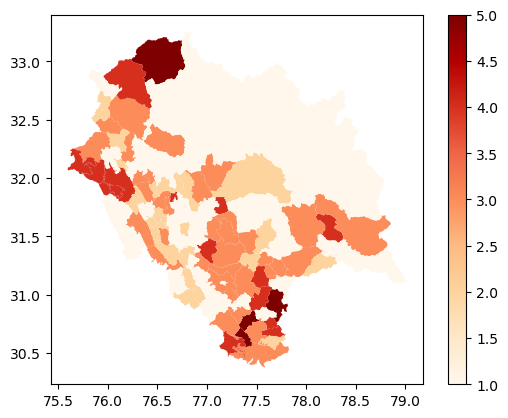

In [14]:
Aug_23.plot(column="vulnerability", legend = True,cmap="OrRd")

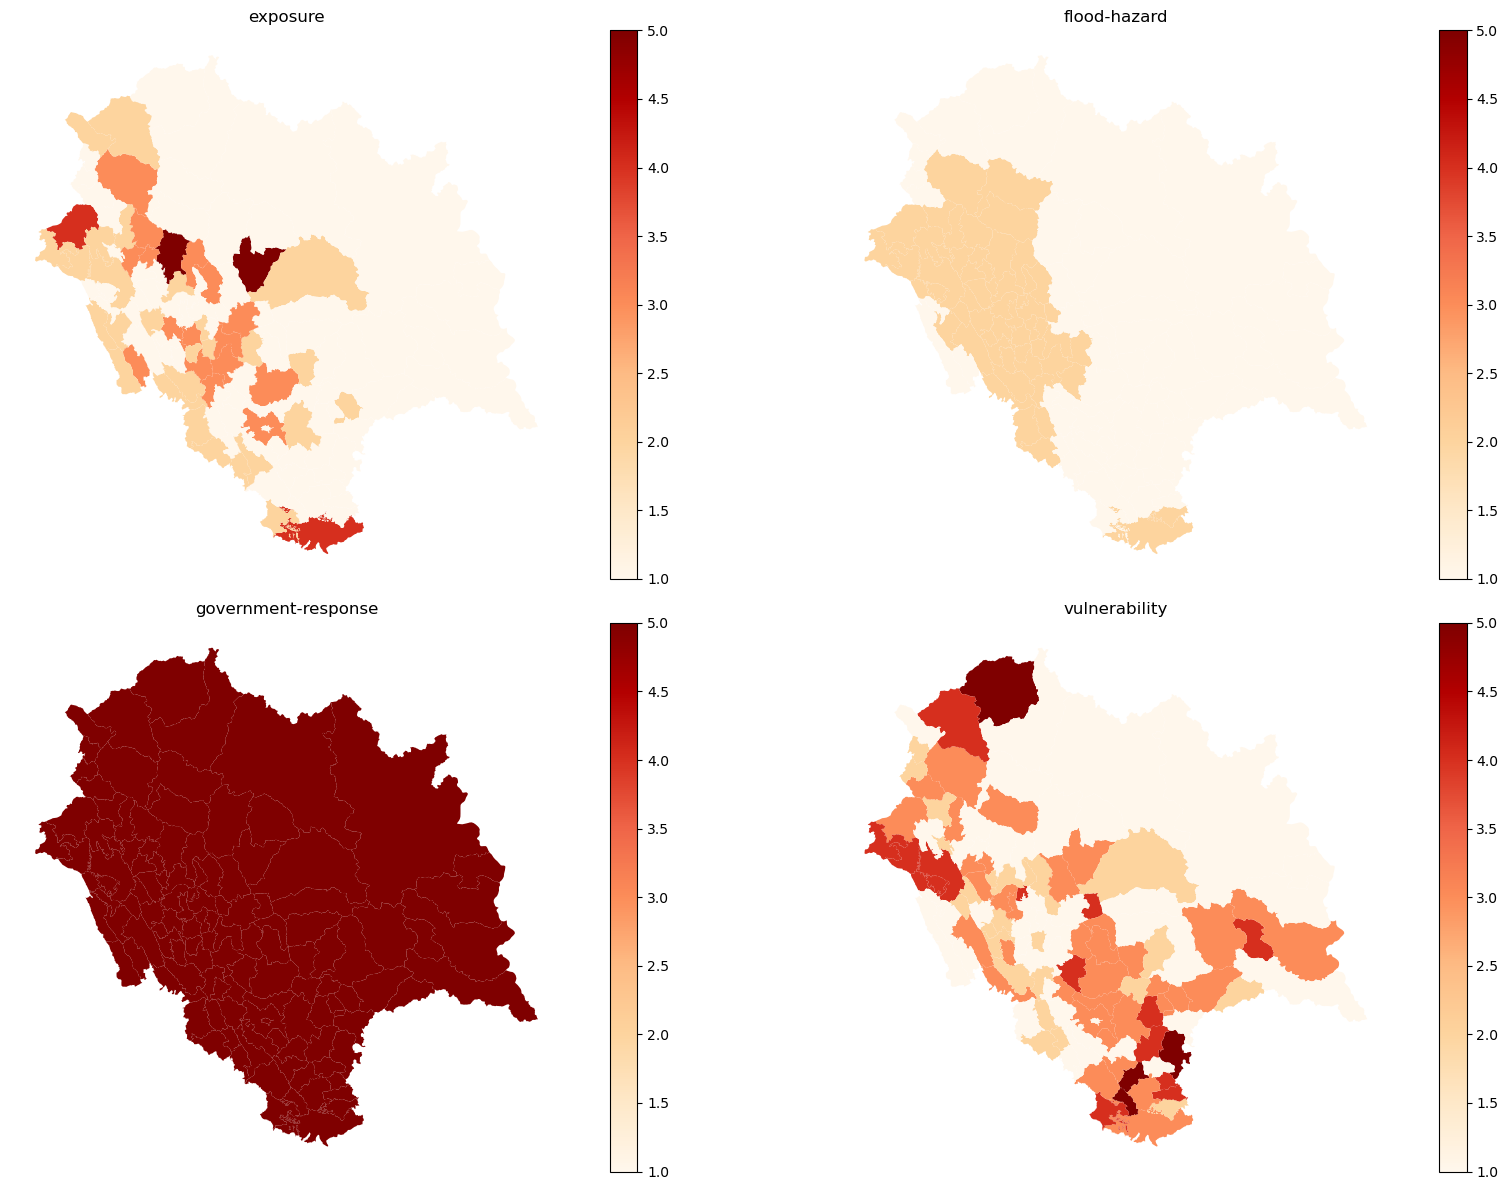

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

f, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

columns_plot = ['exposure','flood-hazard','government-response','vulnerability']

legend_width = 0.1
legend_artists = []
vmin, vmax = 1, 5


# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(columns_plot):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    im = Aug_23.plot(
            column=col,
            ax=ax,
            #scheme="Quantiles",
            linewidth=0,
            cmap="OrRd",
            legend=True,
            vmin = vmin,
            vmax = vmax,
    )
   # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of the variable being plotted
    ax.set_title(col)


    # Create a legend artist
    legend_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='none', markersize=20, label=f"{col} Values")
    legend_artists.append(legend_patch)

# Add a legend outside the subplots
#f.legend(handles=legend_artists, loc='center right', bbox_to_anchor=(1.1, 0.5), title='Legend', fontsize=18)


# Adjust layout to prevent overlapping legends
plt.tight_layout()
#plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.3)

# Display the figure
plt.show()